<a href="https://colab.research.google.com/github/saulobritto/genome-assembly-gcolab/blob/main/SCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Search and Count Engine (SCE)

---

**Código desenvolvido por Saulo Britto da Silva**

*Última atualização no dia 05.11.2020*

>Programa para procurar uma palavra/termo em múltiplos arquivos em múltiplas pastas, retornando quantas vezes o termo aparece em cada arquivo e gerando um CSV da pesquisa, que pode ser baixado.

---



##Resultado para CSV

---

**Código desenvolvido por Saulo Britto da Silva**

*Última atualização no dia 05.11.2020*

>Programa para procurar uma palavra/termo em múltiplos arquivos em múltiplas pastas, retornando quantas vezes o termo aparece em cada arquivo e gerando um CSV da pesquisa, que pode ser baixado.

---



In [ ]:
#Execute esta célula para montar o drive (para o Colab ter acesso ao My Drive)
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


###Código Fonte


---
**Execute todas as células desta seção**

Você pode realizar isto apenas clicando no botão executar, sem necessidade de abrir as células ocultas


---



In [ ]:
#importando os pacotes necessários
import os
import pathlib
import pandas as pd
import numpy as np

In [ ]:
def sce(palavra, onde, tipo, saida):
  string = [palavra]
  x = []
  files = list(pathlib.Path(onde).glob("**/*"+tipo))
  z = ['Arquivo', 'Palavra', 'Contagem']
  for filename in files:
    with open(filename, 'r') as f:
        data = f.read()
        for s in string:
          p = os.path.basename(filename)
          final = [p[:-4], s, data.count(s)]
          x.append(final)
  #cria duas tabelas referente à pesquisa em dois locais diferentes
  n = pd.DataFrame(np.array(x), columns = z)
  #cria o CSV
  n.to_csv(saida+'.csv')
  print(n)
  info = pd.DataFrame.info(n)
  print(info)
  #Criando gráfico
  n.groupby(['Contagem']).Contagem.count().plot(kind='bar', title='Quantidade de arquivos por contagem',legend='Contagem', xlabel='Contagem', ylabel='Quantidade de arquivos')
  

###Utilizando o código


---
**sce(palavra, onde, tipo, saida)**

* palavra = palavra a ser procurada

* onde = local onde o arquivo se encontra

* tipo = tipo de arquivo a ser lido

* saida = nome_arquivo_de_saida



           Arquivo Palavra Contagem
0       02_06_cro2    ExpA        0
1         1.1_cro1    ExpA        0
2       02_06_cro1    ExpA        0
3         1.1_cro2    ExpA        0
4    5_155_2M_cro1    ExpA        0
..             ...     ...      ...
101       SP9_cro1    ExpA        0
102       SP9_cro2    ExpA        0
103       SP8_cro2    ExpA        0
104       SP8_cro1    ExpA        0
105      SP10_cro2    ExpA        0

[106 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Arquivo   106 non-null    object
 1   Palavra   106 non-null    object
 2   Contagem  106 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB
None


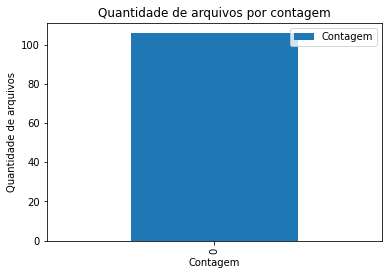

In [ ]:
sce('ExpA', '/content/drive/My Drive/IC UFLA/Genomas', 'gbk', 'teste')

###Download CSV gerado


---
Insira o 'nome_arquivo_de_saida.csv' abaixo


In [ ]:
from google.colab import files

#Insira o nome da saida.csv para download
files.download("NOME_ARQUIVO_DE_SAIDA.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Resultado para Google Sheets
---

**Código desenvolvido por Saulo Britto da Silva**

*Última atualização no dia 05.11.2020*

>Programa para procurar uma palavra/termo em múltiplos arquivos em múltiplas pastas, retornando quantas vezes o termo aparece em cada arquivo e gerando uma planilha do Google da pesquisa, que pode ser baixada/editada.

---



In [ ]:
#Execute esta célula para montar o drive (para o Colab ter acesso ao My Drive)
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
#Instale o pacote gspread, que o google criou para integrar o Google Colab com o Google Sheets
!pip install --upgrade gspread

In [ ]:
#Libere a autenticação e credenciais para conectar o Colab no Drive, permitindo importar/exportar arquivos
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

In [ ]:
#Crie uma planilha, coloque o nome abaixo
planilha = gc.create('NOME_DA_PLANILHA')

In [ ]:
#Abra a planilha para editá-la
worksheet = gc.open('NOME_DA_PLANILHA').sheet1

###Código Fonte


---
**Execute todas as células desta seção**

Você pode realizar isto apenas clicando no botão executar, sem necessidade de abrir as células ocultas


---



In [ ]:
#importando os pacotes necessários
import os
import pathlib
import pandas as pd
import numpy as np

In [ ]:
def sce(palavra, onde, tipo):
  string = [palavra]
  x = []
  files = list(pathlib.Path(onde).glob("**/*"+tipo))
  z = ['Arquivo', 'Palavra', 'Contagem']
  for filename in files:
    with open(filename, 'r') as f:
        data = f.read()
        for s in string:
          p = os.path.basename(filename)
          final = [p[:-4], s, data.count(s)]
          x.append(final)
  worksheet.clear()
  worksheet.update(x)
  worksheet.insert_row(z, index=1)
  worksheet.freeze(rows=1)
  rows = worksheet.get_all_values()
  rows = pd.DataFrame.from_records(rows)
  info = pd.DataFrame.info(rows)
  print(rows)
  print(info)
  n = pd.DataFrame(np.array(x), columns = z)
  #cria um CSV p/ gráfico
  n.to_csv('cache.csv')
  #Criando gráfico
  n.groupby(['Contagem']).Contagem.count().plot(kind='bar', title='Quantidade de arquivos por contagem',legend='Contagem', xlabel='Contagem', ylabel='Quantidade de arquivos')


###Utilizando o código


---
**sce(palavra, onde, tipo)**

* palavra = palavra a ser procurada

* onde = local onde o arquivo se encontra

* tipo = tipo de arquivo a ser lido



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       43 non-null     object
 1   1       43 non-null     object
 2   2       43 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB
                 0        1         2
0          Arquivo  Palavra  Contagem
1      A13334_cro1     bepG         0
2         A19_cro1     bepG         0
3     BAB8416_cro1     bepG         0
4         A19_cro2     bepG         2
5      A13334_cro2     bepG         2
6         BDW_cro2     bepG         2
7     BAB8416_cro2     bepG         2
8         BDW_cro1     bepG         0
9          BD_cro1     bepG         0
10         BD_cro2     bepG         2
11        BER_cro2     bepG         1
12        BFY_cro1     bepG         0
13        BJ1_cro1     bepG         0
14        BER_cro1     bepG         0
15        BFY_cro2     bepG         1
16   CIIMSNV4_cro1     bepG     

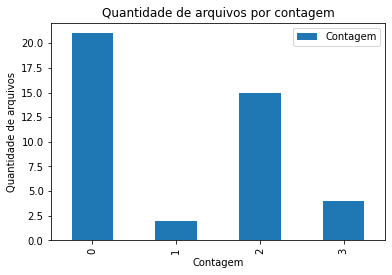

In [ ]:
sce('bepG', '/content/drive/My Drive/IC UFLA/Referências', 'gbk')

###Compartilhando a planilha


---
Apenas insira o(s) e-mail(s) ou exclua a linha



In [ ]:
#Compartilha a tabela gerada com outros usuários, dando permissões específicas
#Copie e cole o código ou exclua com quantos e-mails quiser compartilhar

planilha.share('EMAIL1@gmail.com', perm_type='user', role='writer')
planilha.share('EMAIL2@gmail.com', perm_type='user', role='writer')
planilha.share('EMAIL3@gmail.com', perm_type='user', role='writer')
